In [10861]:
import pandas as pd

In [10862]:
#Exercise 1

In [10863]:
#Init from dict

In [10864]:
#1.	Create a new dictionary, name it your firstname where firstname _fruits is your first name.

In [10865]:
nicholas_fruits = {}

In [10866]:
#2.	Add four items to the dictionary with names of your favorite fruits as keys and the respective color as values.

In [10867]:
nicholas_fruits['kiwi'] = 'green'
nicholas_fruits['cherry'] = 'red'
nicholas_fruits['banana'] = 'yellow'
nicholas_fruits['orange'] = 'orange'

In [10868]:
#3.	Convert the dictionary into a pandas series named firstname_f.

In [10869]:
nicholas_f = pd.Series(nicholas_fruits, name = 'nicholas_f')

In [10870]:
#4.	Print out the second and third items.

In [10871]:
(f'Second Item: {nicholas_f.iloc[1]}')

'Second Item: red'

In [10872]:
(f'Third Item: {nicholas_f.iloc[2]}')

'Third Item: yellow'

In [10873]:
#5.	Create a sub series named firstname_f2 containing the second and third items.

In [10874]:
nicholas_f2 = nicholas_f.iloc[1:3]
(f'Last item inside the sub series: {nicholas_f2.iloc[-1]}')

'Last item inside the sub series: yellow'

In [10875]:
#6.	Printout from the sub series the last item using iloc.

In [10876]:
#Handling time

In [10877]:
#1.	Create a list containing four  rainfall amounts  of values 10, 23,24,30 name the list firstname_amounts.

In [10878]:
nicholas_amounts = [10, 23, 24, 30]

In [10879]:
#2.	Using pandas create a date_range for todays date/time (you can set any time) with four time intervals.

In [10880]:
from datetime import datetime
today = datetime(2024, 1, 28, 5, 35, 0)
date_range = pd.date_range(start = today, periods = 4, freq = '6H')

In [10881]:
#3.	Create a series that combines both the list and date range name it firstname_rainfall amounts_today.

In [10882]:
nicholas_rainfall_amounts_today = pd.Series(nicholas_amounts, index = date_range, name = 'nicholas rainfall amounts today')

In [10883]:
#4.	Plot as bar chart.

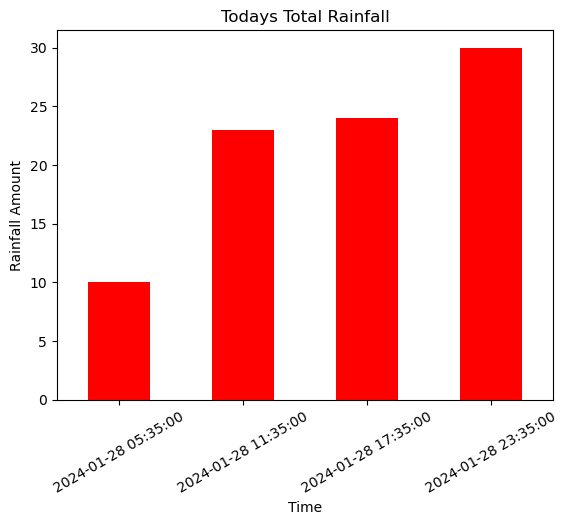

In [10884]:
import matplotlib.pyplot as plt
nicholas_rainfall_amounts_today.plot(kind = 'bar', color = 'red')
plt.title('Todays Total Rainfall')
plt.xlabel('Time')
plt.ylabel('Rainfall Amount')
# I am rotating the x-axis text for visual clarity
plt.xticks(rotation = 30)
plt.show()

In [10885]:
#Pandas Multi - indexing

In [10886]:
import numpy as np
nicholas_d5 = pd.DataFrame(
  {
    ("public", "birthyear"):
        {("Paris","alice"):1985, ("Paris","bob"): 1984, ("London","charles"): 1992},
    ("public", "hobby"):
        {("Paris","alice"):"Biking", ("Paris","bob"): "Dancing"},
    ("private", "weight"):
        {("Paris","alice"):68, ("Paris","bob"): 83, ("London","charles"): 112},
    ("private", "children"):
        {("Paris", "alice"):np.nan, ("Paris","bob"): 3, ("London","charles"): 0}
  }
)

In [10887]:
#1.	print out a dataframe containing all “private” columns

In [10888]:
private = nicholas_d5.filter(like = 'private')
private

private         
                weight children
Paris  alice        68      NaN
       bob          83      3.0
London charles     112      0.0

In [10889]:
#2.	Swap the columns and rows (hint: look at transpose)

In [10890]:
# Unsure fromt he instructions if its a transpose of the original d5 data set or the private filtered data set
transpose = np.transpose(nicholas_d5)
transpose

Paris           London
                    alice      bob charles
public  birthyear    1985     1984    1992
        hobby      Biking  Dancing     NaN
private weight         68       83     112
        children      NaN      3.0     0.0

In [10891]:
# Private Transposed data set
private_transpose = np.transpose(private)
private_transpose

Paris        London
                 alice   bob charles
private weight    68.0  83.0   112.0
        children   NaN   3.0     0.0

In [10892]:
#Querying

In [10893]:
#Use the query() to query the people dataframe  you created earlier and retrieve everything related to alice.

In [10894]:
nicholas_d5.query('index.get_level_values(1) == "alice"')

public         private         
            birthyear   hobby  weight children
Paris alice      1985  Biking      68      NaN

In [10895]:
#5	Operations on dataframes

In [10896]:
names = ['Tomas', 'Sabrina', 'Emily', 'Sam']
index = pd.Index(names, name = 'Student')

columns = ['April', 'May', 'June', 'July']
grades = np.random.randint(0, 100, size = (len(names), 4))

nicholas_grades = pd.DataFrame(grades, index = index, columns = columns)
nicholas_grades

,April,May,June,July
Student,,,,
Tomas,76,7,9,11
Sabrina,61,79,76,61
Emily,52,99,25,92
Sam,33,60,34,97


In [10897]:
#1.	Print out the average for the month of April

In [10898]:
average = nicholas_grades['April'].mean()
(f'Average grade for the month of April: {average}%')

'Average grade for the month of April: 55.5%'

In [10899]:
#2.	Adjust all the grades by 2% (i.e. increase)

In [10900]:
adjustment = nicholas_grades * 1.02
adjustment

,April,May,June,July
Student,,,,
Tomas,77.52,7.14,9.18,11.22
Sabrina,62.22,80.58,77.52,62.22
Emily,53.04,100.98,25.50,93.84
Sam,33.66,61.20,34.68,98.94


In [10901]:
#3.	Printout the grades for the month of may that are higher than 50%

In [10902]:
grades_higer_50_may = nicholas_grades['May'][nicholas_grades['May'] > 50]
grades_higer_50_may

Student
Sabrina    79
Emily      99
Sam        60
Name: May, dtype: int32

In [10903]:
#4.	Group the failing students i.e. the students with average over four month below 50%

In [10904]:
# The .copy() method I added to remove an error
failing_grades = nicholas_grades[nicholas_grades.mean(axis = 1) < 50].copy()
# I am adding an Average column for visual clarity
failing_grades['Average'] = nicholas_grades.mean(axis = 1)
failing_grades

,April,May,June,July,Average
Student,,,,,
Tomas,76,7,9,11,25.75


In [10905]:
#Exercise 2

In [10906]:
#np.functionname

In [10907]:
#Add a cell to create a function and name it  my_function_firstname, where firstname is your first name.
#Let the function return an integer value stored in one byte i.e. ‘int8’ of (4x)*(3y). Where x is the number of rows and y is the number of columns.
#Use np.fromfunction() to generate  three elements each are two by six using the  my_fuction_firstname.


In [10908]:
def my_function_nicholas(rows, columns):
    value = (4 * rows) * (3 * columns)
    return np.int8(value)

In [10909]:
#Inspect the code under this section copy it, add a cell to extract values 16,17,18

In [10910]:
b = np.arange(48).reshape(4, 12)
b

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35],
       [36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]])

In [10911]:
# 1 is the second row, 4:7 means all indexes between index 4 and 7 ie. 16,17,18
extracted_values = b[1, 4:7]
extracted_values

array([16, 17, 18])

In [10912]:
#Inspect the code under this section copy it, then add a cell to iterate over c and print the Boolean values for items equivalent to zeros.

In [10913]:
c = np.arange(24).reshape(2, 3, 4)  # A 3D array (composed of two 3x4 matrices)
c

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [10914]:
for matrix in c:
    for row in matrix:
        for value in row:
            # end = ' ' so the original shape of the matrix stays
            print(value == 0, end = ' ')
        print()
    print()

True False False False 
False False False False 
False False False False 

False False False False 
False False False False 
False False False False 



In [10915]:
#Inspect the code under this section copy it, then add a cell to create a variable name it q5_firstname where firstname 
#is your firstname and vertically stack q1 and q2 and print the output.

In [10916]:
q1 = np.full((3,4), 1.0)
q2 = np.full((4,4), 2.0)
q3 = np.full((3,4), 3.0)
q4 = np.vstack((q1, q2, q3))
q4

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [3., 3., 3., 3.],
       [3., 3., 3., 3.]])

In [10917]:
q5_nicholas = np.vstack((q1, q2))
q5_nicholas

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.]])

In [10918]:
#Inspect the code under this section copy it, then add a cell to create a variable name it q8_firstname where 
#firstname is your firstname , concatenate q1 and q3 and print the results.

In [10919]:
q7 = np.concatenate((q1, q2, q3), axis=0)  # Equivalent to vstack
q7

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [3., 3., 3., 3.],
       [3., 3., 3., 3.]])

In [10920]:
q8_nicholas = np.concatenate((q1, q3), axis = 0)
q8_nicholas

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [3., 3., 3., 3.],
       [3., 3., 3., 3.],
       [3., 3., 3., 3.]])

In [10921]:
#Inspect the code under this section copy it, then add a cell and create a variable named t_firstname where firstname is your name, 
#let the variable hold any ndaray size 2 by 7 with zero values, print the result then transpose and print the result.

In [10922]:
t = np.arange(24).reshape(4,2,3)
t

array([[[ 0,  1,  2],
        [ 3,  4,  5]],

       [[ 6,  7,  8],
        [ 9, 10, 11]],

       [[12, 13, 14],
        [15, 16, 17]],

       [[18, 19, 20],
        [21, 22, 23]]])

In [10923]:
t_nicholas = np.zeros((1, 2, 7))
t_nicholas

array([[[0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.]]])

In [10924]:
transposed = np.transpose(t_nicholas, axes = (1, 2, 0))
transposed

array([[[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]]])

In [10925]:
#Inspect the code under this section copy it, then  add a cell to create 2 ndarys name 
#the first a1 and the second a2. Both arrays should contain numbers in the range 0 to 8, 
#inclusive . Print a1 and a2. Reshape a1 to a 2 by 4. Reshape a2 to a 4 by 2. Create a new 
#variable a3 _first name where firstname is your first name which holds the dot product  of 
#a1 and a2 name it a3 and print the output of a3_firstname, then the shape of a3_first name.

In [10926]:
n1 = np.arange(10).reshape(2, 5)
n1

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [10927]:
a1 = np.arange(8).reshape(2, 4)
a1

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [10928]:
a2 = np.arange(8).reshape(4, 2)
a2

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]])

In [10929]:
a3_nicholas = a1.dot(a2)
a3_nicholas

array([[28, 34],
       [76, 98]])

In [10930]:
#Add a cell to create a new 4 by 4 ndaray with values between 0 and 15, name the variable that 
#holds the array your first name, print the array and the inverse of the array.

In [10931]:
import numpy.linalg as linalg

In [10932]:
m3 = np.array([[1,2,3],[5,7,11],[21,29,31]])
m3

array([[ 1,  2,  3],
       [ 5,  7, 11],
       [21, 29, 31]])

In [10933]:
array_nicholas = np.array([[1, 2, 5, 1],[0, 5, 4, 2],[-1, 4, -5, 0],[1, 2, 3, 4]])
array_nicholas

array([[ 1,  2,  5,  1],
       [ 0,  5,  4,  2],
       [-1,  4, -5,  0],
       [ 1,  2,  3,  4]])

In [10934]:
linalg.inv(array_nicholas)

array([[ 1.39534884, -1.13953488,  0.61627907,  0.22093023],
       [ 0.23255814, -0.02325581,  0.18604651, -0.04651163],
       [-0.09302326,  0.20930233, -0.1744186 , -0.08139535],
       [-0.39534884,  0.13953488, -0.11627907,  0.27906977]])

In [10935]:
#Add a cell to create a 4 by 4 identity array.

In [10936]:
np.eye(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [10937]:
#Add a cell to create a 3 by 3 matrix with values generated randomly then printout the determinant of the matrix.

In [10938]:
matrix = np.random.randint(0, 10, size = (3, 3))
matrix

array([[2, 1, 6],
       [8, 5, 3],
       [4, 9, 1]])

In [10939]:
linalg.det(matrix)

271.9999999999999

In [10940]:
#Add a cell to create a 4 by 4 matrix with values generated randomly, assign the matrix to a 
#variable named e_firstname. Printout the Eigenvalue and eigenvectors of the matrix.

In [10941]:
e_nicholas = np.random.randint(0, 10, size = (4, 4))
linalg.eig(e_nicholas)

EigResult(eigenvalues=array([11.73092387+0.j        , -3.313061  +0.j        ,
        1.29106856+3.66910507j,  1.29106856-3.66910507j]), eigenvectors=array([[-0.53850876+0.j        , -0.40086465+0.j        ,
        -0.32059592-0.2105436j , -0.32059592+0.2105436j ],
       [-0.43129883+0.j        ,  0.65970266+0.j        ,
        -0.290992  -0.15148798j, -0.290992  +0.15148798j],
       [-0.60949373+0.j        ,  0.07318425+0.j        ,
         0.70123674+0.j        ,  0.70123674-0.j        ],
       [-0.39052148+0.j        , -0.6314618 +0.j        ,
         0.07822664+0.4974056j ,  0.07822664-0.4974056j ]]))

In [10942]:
#Add a cell to solve the following linear equations:
#2x+4y+z =12
#3x+8y+2z =16
#X+2y+3z = 3
#Check the results using the allcolse method.

In [10943]:
coeffs = np.array([[2,4,1], [3,8,2], [1,2,3]])
constants = np.array([12, 16, 3])

solution = linalg.solve(coeffs, constants)
solution

array([ 8. , -0.7, -1.2])

In [10944]:
coeffs.dot(solution), constants

(array([12., 16.,  3.]), array([12, 16,  3]))

In [10945]:
#Exercise 3

In [10946]:
#Add a cell at the end to generate a 2 D graph as follows:
#x holds 1000 values between -4 and 4
#z holds 1000 values between -5 and 5
#y = x^2 + z^3 +6
#plot x and y
#name the plot(i.e.set the title) “Ploynomial_firstname” where firstname is your firstname.
#Give names for the x and y axis.

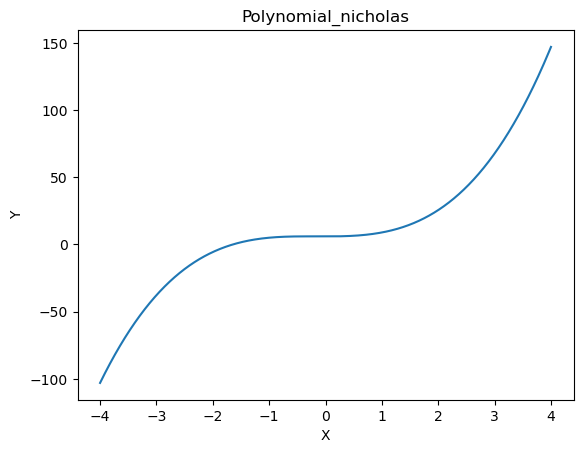

In [10947]:
x = np.linspace(-4, 4, 1000)
z = np.linspace(-5, 5, 1000)
y = x**2 + z**3 + 6
plt.plot(x, y)
plt.title('Polynomial_nicholas')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [10948]:
#Add a cell at the end to generate a plot using subplot2grid with the following characteristics:
#A 4 by 4 grid.
#On the first row plot the function x^2 in a dashed green line.
#On the second-row plot two functions, the first function x^3 in yellow color and the second function x^4 spanning three columns in red color.
#On the third-row plot two functions the first X^6 in a dashed blue color and the second is X=x in magna (pink) color.
#On the fourth row plot one function^7 spanning all columns in dotted red.

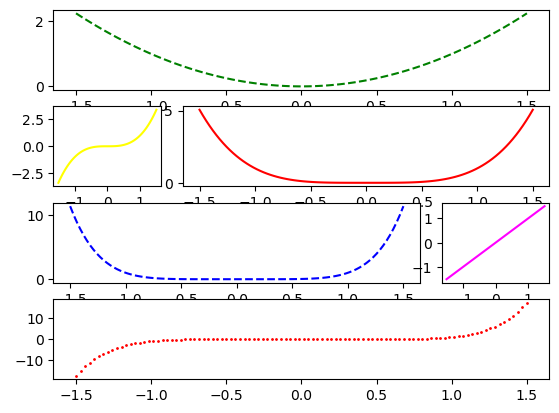

In [10949]:
x = np.linspace(-1.5, 1.5, 100)
first = plt.subplot2grid((4, 4), (0, 0), colspan = 4)
first.plot(x, x**2, '--', color = 'green')

second = plt.subplot2grid((4, 4), (1, 0), colspan = 1)
second.plot(x, x**3, color = 'yellow')

third = plt.subplot2grid((4, 4), (1, 1), colspan = 3)
third.plot(x, x**4, color = 'red')

fourth = plt.subplot2grid((4, 4), (2, 0), colspan = 3)
fourth.plot(x, x**6, '--', color = 'blue')

fifth = plt.subplot2grid((4, 4), (2, 3), colspan = 1)
fifth.plot(x, x, color = 'magenta')

sixth = plt.subplot2grid((4, 4), (3, 0), colspan = 4)
sixth.plot(x, x**7, '.', markersize = 2, color = 'red')